This notebook was used to compare different model architectures based on the test scores

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
experiment_folders = glob.glob("../experiment_output_submission/multif0_*exper*")
print(experiment_folders)

['../experiment_output_submission/multif0_exper2', '../experiment_output_submission/multif0_exper12', '../experiment_output_submission/multif0_exper4_batchin', '../experiment_output_submission/multif0_exper9', '../experiment_output_submission/multif0_exper2_batchin', '../experiment_output_submission/multif0_exper15', '../experiment_output_submission/multif0_exper17', '../experiment_output_submission/multif0_exper7', '../experiment_output_submission/multif0_exper11_batchin_pitch', '../experiment_output_submission/multif0_exper14', '../experiment_output_submission/multif0_exper11_batchin_mf0incomplete', '../experiment_output_submission/multif0_exper11_batchin_mel2', '../experiment_output_submission/multif0_exper8', '../experiment_output_submission/multif0_exper10_batchin', '../experiment_output_submission/multif0_exper3', '../experiment_output_submission/multif0_exper16', '../experiment_output_submission/multif0_exper14_batchin', '../experiment_output_submission/multif0_exper12_batchin',

In [3]:
def get_aggregate_df(dataset_fname):
    metrics = [
        'Precision', 'Recall','Accuracy', 'Substitution Error',
        'Miss Error', 'False Alarm Error', 'Total Error', 'Chroma Precision',
        'Chroma Recall', 'Chroma Accuracy', 'Chroma Substitution Error',
        'Chroma Miss Error', 'Chroma False Alarm Error', 'Chroma Total Error'
    ]

    scores_mean = {m: [] for m in metrics}
    scores_std = {m: [] for m in metrics}
    model_key = []
    data_frames = []
    
    experiment_folders = []
    for i in range(17):
        experiment_folders.append("../experiment_output_submission/multif0_exper{}".format(str(i+1)))
        experiment_folders.append("../experiment_output_submission/multif0_exper{}_batchin".format(str(i+1)))
    
    for folder in experiment_folders:
        dataset_scores = os.path.join(folder, dataset_fname)
        if os.path.exists(dataset_scores):
            model_key.append(folder)
            df = pd.read_csv(dataset_scores)
            for m in metrics:
                scores_mean[m].append(df.ix[1][m])
                scores_std[m].append(df.ix[2][m])
    
    return scores_mean, scores_std, model_key

In [4]:
bach10_mean, bach10_std, bach10_models = get_aggregate_df("bach10_score_summary.csv")
mdb_mean, mdb_std, mdb_models = get_aggregate_df("mdb_test_score_summary.csv")
su_mean, su_std, su_models = get_aggregate_df("su_score_summary.csv")

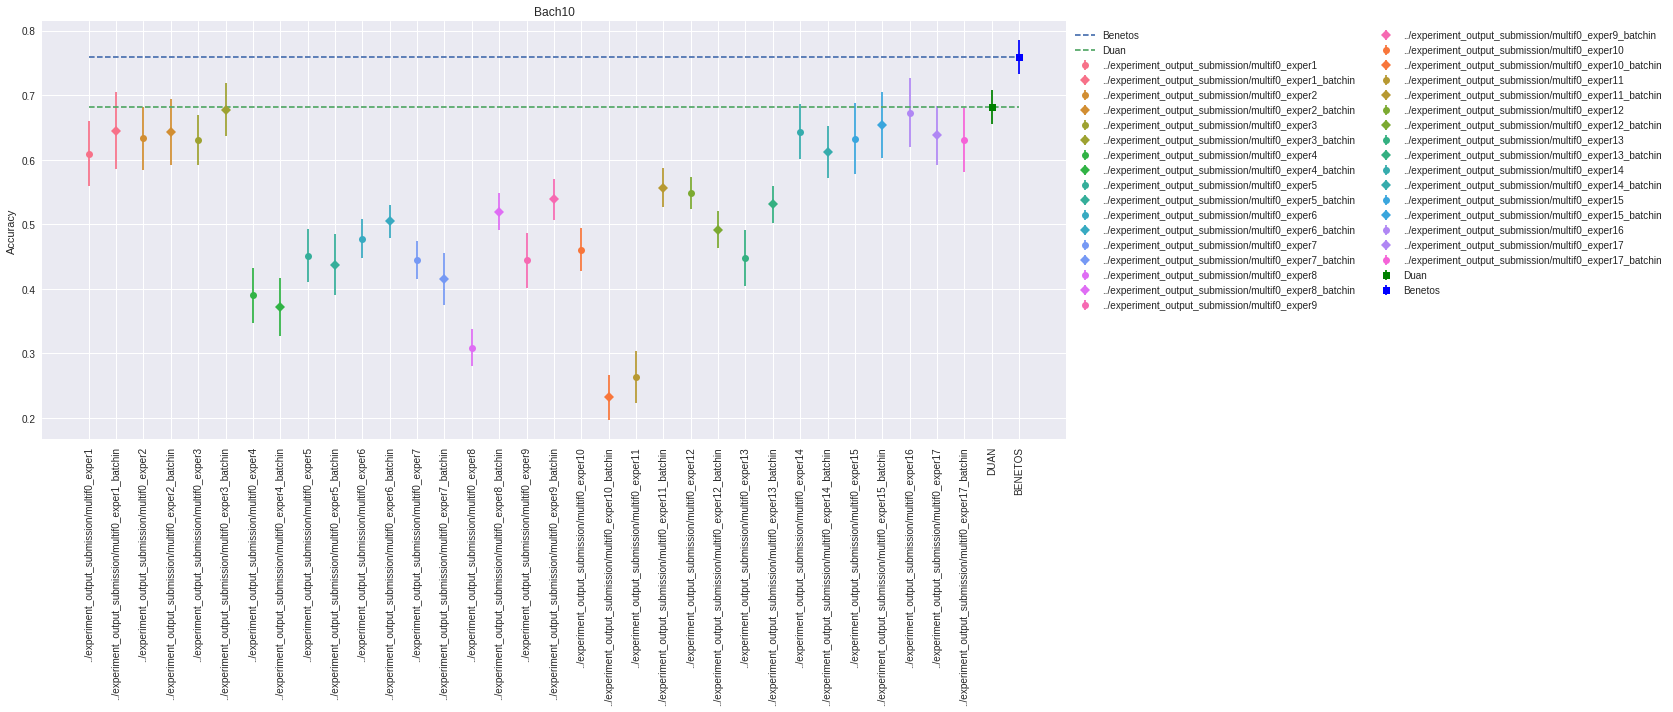

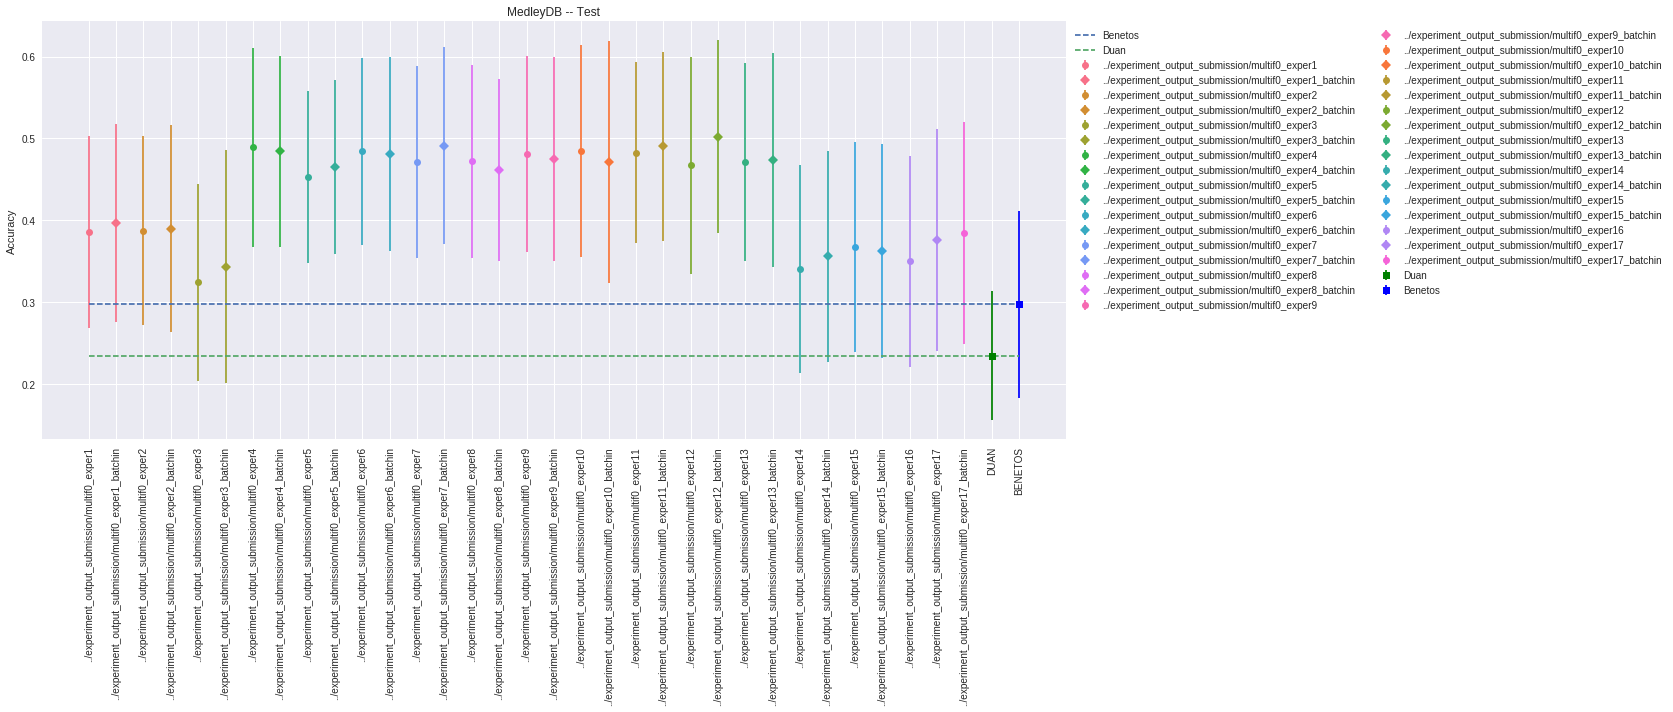

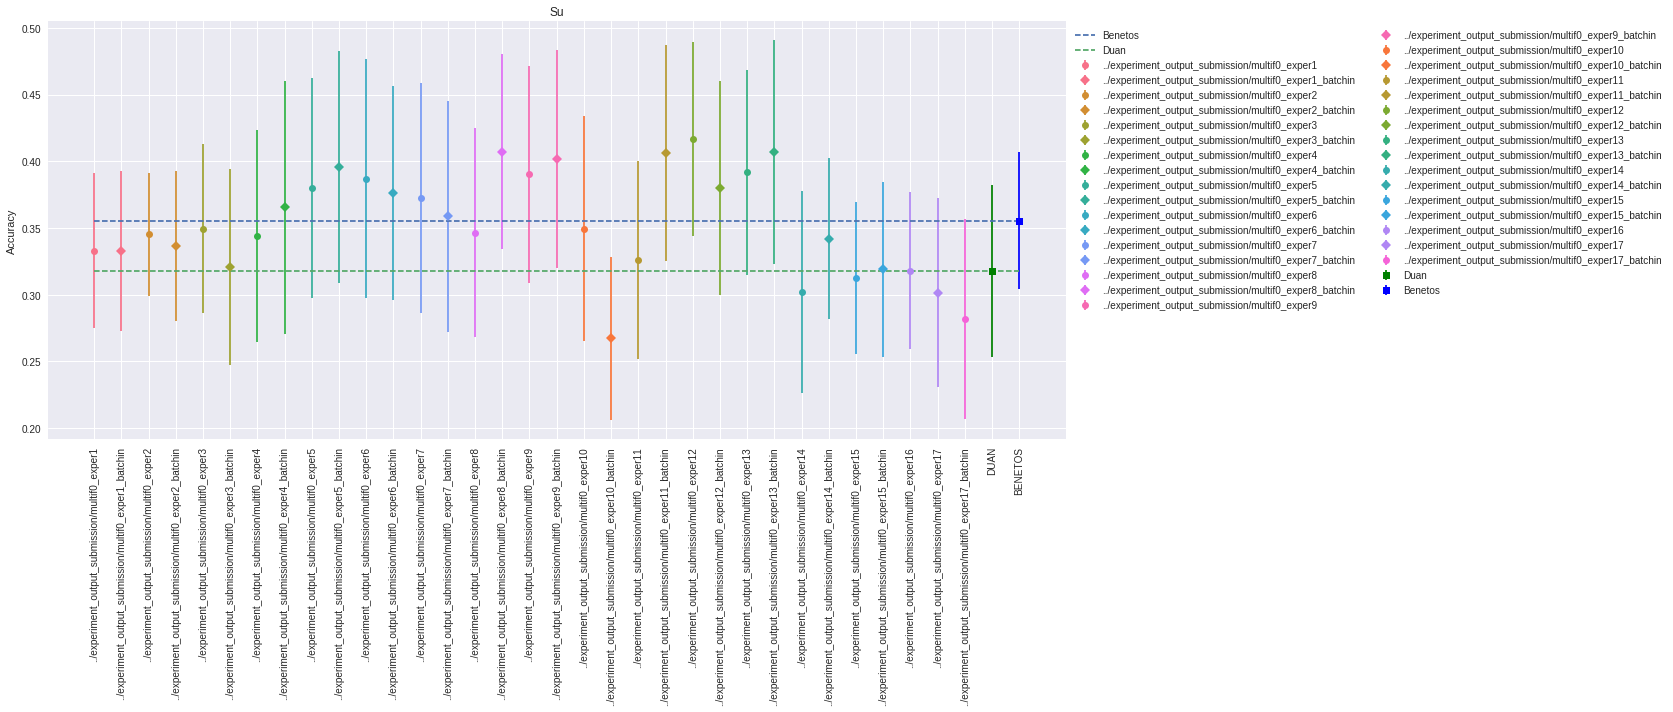

In [5]:
m = 'Accuracy'

tick_colors = sns.color_palette('husl', 17)
formats = ['o', 'D']

plt.figure(figsize=(15, 10))
plt.title("Bach10")
plt.plot([0, 34], [0.758471, 0.758471], '--', label='Benetos')
plt.plot([0, 34], [0.681651, 0.681651], '--', label='Duan')
x_labs = []
for j, k in enumerate(bach10_models):
    fmt = formats[j % 2]
    if j % 2 == 0:
        color = tick_colors[j % 17]
    else:
        color = tick_colors[(j-1) % 17]
    plt.errorbar(j, bach10_mean[m][j], yerr=bach10_std[m][j], fmt=fmt, label=k, color=color)
    x_labs.append(k)
plt.errorbar(j+1, 0.681651, 0.026199, fmt='s', label='Duan', color='g')
plt.errorbar(j+2, 0.758471, 0.026418, fmt='s', label='Benetos', color='b')
plt.xticks(range(len(bach10_models)) + [33, 34], x_labs + ['DUAN', 'BENETOS'], rotation='vertical')
plt.ylabel(m)
plt.legend(ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("../paper-figs/all_results_Bach10.pdf", format='pdf')

plt.figure(figsize=(15, 10))
plt.title("MedleyDB -- Test")
plt.plot([0, 34], [0.297041, 0.297041], '--', label='Benetos')
plt.plot([0, 34], [0.234573, 0.234573], '--', label='Duan')
x_labs = []
for j, k in enumerate(mdb_models):
    fmt = formats[j % 2]
    if j % 2 == 0:
        color = tick_colors[j % 17]
    else:
        color = tick_colors[(j-1) % 17]
    plt.errorbar(j, mdb_mean[m][j], yerr=mdb_std[m][j], fmt=fmt, label=k, color=color)
    x_labs.append(k)
plt.errorbar(j+1, 0.234573, 0.079084, fmt='s', label='Duan', color='g')
plt.errorbar(j+2, 0.297041, 0.114145, fmt='s', label='Benetos', color='b')
    
plt.xticks(range(len(mdb_models)) + [33, 34], x_labs + ['DUAN', 'BENETOS'], rotation='vertical')
plt.ylabel(m)
plt.legend(ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("../paper-figs/all_results_mdbtest.pdf", format='pdf')


plt.figure(figsize=(15, 10))
plt.title("Su")
plt.plot([0, 34], [0.355545, 0.355545], '--', label='Benetos')
plt.plot([0, 34], [0.317448, 0.317448], '--', label='Duan')
x_labs = []
for j, k in enumerate(su_models):
    fmt = formats[j % 2]
    if j % 2 == 0:
        color = tick_colors[j % 17]
    else:
        color = tick_colors[(j-1) % 17]
    plt.errorbar(j, su_mean[m][j], yerr=su_std[m][j], fmt=fmt, label=k, color=color)
    x_labs.append(k)
plt.errorbar(j+1, 0.317448, 0.064461, fmt='s', label='Duan', color='g')
plt.errorbar(j+2, 0.355545, 0.051333, fmt='s', label='Benetos', color='b')

plt.xticks(range(len(su_models)) + [33, 34], x_labs + ['DUAN', 'BENETOS'], rotation='vertical')
plt.ylabel(m)
plt.legend(ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("../paper-figs/all_results_su.pdf", format='pdf')


In [6]:
bach10_mean, bach10_std, bach10_models = get_aggregate_df("bach10_score_summary.csv")
mdb_mean, mdb_std, mdb_models = get_aggregate_df("mdb_test_score_summary.csv")
su_mean, su_std, su_models = get_aggregate_df("su_score_summary.csv")

table = []
for b, s, m, key in zip(bach10_mean['Accuracy'], su_mean['Accuracy'], mdb_mean['Accuracy'], bach10_models):
    table.append([key, b, s, m])

aggregate_df = pd.DataFrame(table, columns=['model', 'Bach10', 'Su', 'MDB'])
aggregate_df

,model,Bach10,Su,MDB
0,../experiment_output_submission/multif0_exper1,0.609633,0.333036,0.385450
1,../experiment_output_submission/multif0_exper1...,0.644943,0.332760,0.396667
2,../experiment_output_submission/multif0_exper2,0.633181,0.345376,0.386946
3,../experiment_output_submission/multif0_exper2...,0.642781,0.336703,0.389766
4,../experiment_output_submission/multif0_exper3,0.631189,0.349644,0.324057
5,../experiment_output_submission/multif0_exper3...,0.677460,0.320827,0.343322
6,../experiment_output_submission/multif0_exper4,0.389948,0.343947,0.489066
7,../experiment_output_submission/multif0_exper4...,0.372435,0.365495,0.484351
8,../experiment_output_submission/multif0_exper5,0.451492,0.380291,0.452309
9,../experiment_output_submission/multif0_exper5...,0.437188,0.395811,0.464837
